### Описание датасетов
 - restaurants.csv: содержит информацию о населении города(первое число) и прибыли ресторана в этом городе.
 - houses.csv содержит информацию о площади дома в кв. футах(первое число), количестве комнат в доме(второе число) и стоимости дома(третье число).

**Задание 1.** Загрузите набор данных restaurants.csv.

In [278]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("restaurants.csv", names=["population", "profit"])
df.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


**Задание 2.** Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

Text(0.5, 1.0, 'dependent of population and profit of restaurant')

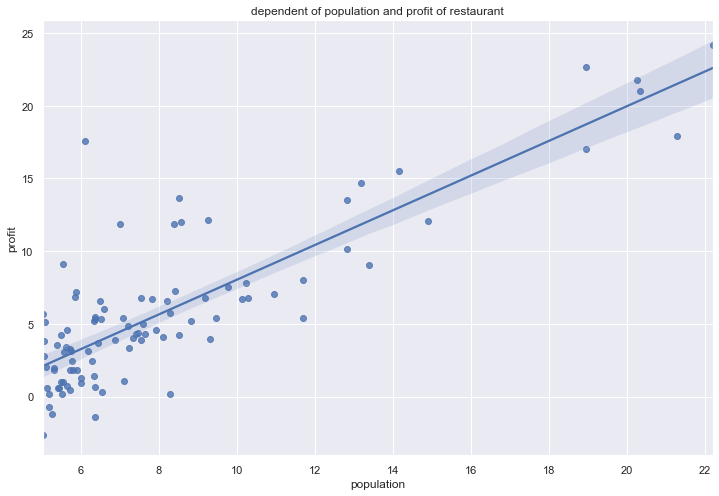

In [292]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12,8)},)
sns.regplot(x="population", y="profit", data=df).set_title("dependent of population and profit of restaurant")

**Задание 3.** Реализуйте функцию потерь MSE для набора данных restaurants.csv.

In order to use MSE we should build any regression model. Here i will use sklearn to make linear regression model. After that I'll create func MSE.

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [238]:
X = np.array(df["population"])
y = np.array(df["profit"])

c = np.array(list(zip(X, X)))
c = c.reshape(-1, 2)

reg = LinearRegression().fit(c, y)

y_pred_sklearn = reg.predict(c)

# y_pred
reg.coef_

array([0.59651682, 0.59651682])

In [239]:
def MSE(y, y_pred):
    return 1 / len(y) * sum([(y_i - y_pred_i) ** 2 for y_i, y_pred_i in zip(y, y_pred)]) 

In [240]:
ours_MSE = MSE(y, y_pred_sklearn)
ours_MSE

8.953942751950352

In [241]:
sklearn_MSE = mean_squared_error(y, y_pred_sklearn)
sklearn_MSE

8.953942751950358

In [242]:
round(ours_MSE, 5) ==  round(sklearn_MSE, 5)

True

**Задание 4.** Реализуйте  функцию  градиентного  спуска  для  выбора  параметров модели.  Постройте  полученную  модель  (функцию)  совместно  с графиком из пункта 2.

Our task based on finding such linear function whick will represent our target feature data in the best way.

$f = a * x + b$

$f_i = f_{i-1} - \nabla_{w} {MSE} * \alpha$

w = (a, b)
When we calc grad for MSE, actually we take derivative to each variable

In [422]:
# for task 5
a_global = []
b_global = []
MSE_global = []


def linear(X, y, lr=0.01, n_epochs=100):
    """
    Using gradient descent this func calculate parameters 
    for linear function: f = ax + b.

    Returns array of 2 parameters (a,b)
    """

    lr = lr
    n_epochs = n_epochs
    a, b = np.random.rand(2, 1)
        
    global MSE_global, a_global, b_global
    MSE_global.clear()
    a_global.clear()
    b_global.clear()

    for epoch in range(n_epochs):

        # predict target param
        y_pred = a * X + b

        # error of prediction
        error = (y - y_pred)

        # find derivative for each param
        a_grad = -2 * (X * error).mean()
        b_grad = -2 * error.mean()

        # for task 5
        MSE_global.append(MSE(y, y_pred))
        a_global.append(a)
        b_global.append(b)

        # chanch our mean param
        a = a - lr * a_grad
        b = b - lr * b_grad
    return np.concatenate([a, b])


def func_a_b(a, b, x):
    return a * x + b

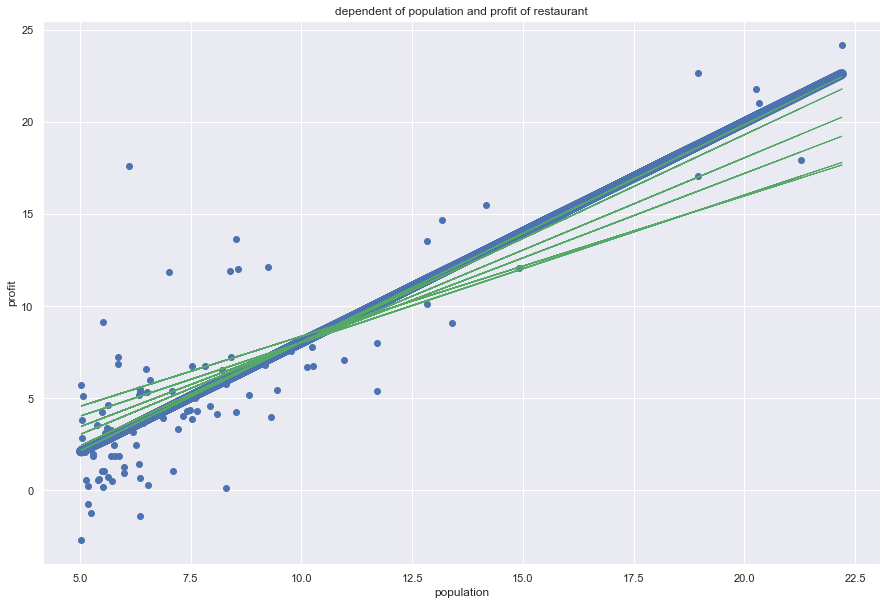

In [548]:
def plot_linear(X, y):
    plt.figure(figsize=(15,10))
    plt.title("dependent of population and profit of restaurant")
    plt.ylabel("profit")
    plt.xlabel("population")

    plt.plot(X, y_pred_sklearn, linewidth=10)
    plt.scatter(X, y)

    n_epochs = [5, 50, 100, 250, 500, 1000]
    for epoch in n_epochs:
        w = linear(X, y, n_epochs=epoch)
        y_pred = np.array([func_a_b(w[0], w[1], x) for x in X])
        plt.plot(X, y_pred, 'g', linewidth=1)
        
plot_linear(X, y)

As we can see, with the rising of n_epochs the accuracy is increasing, so the linear function converges.

**Задание 5.*** Постройте  трехмерный  график  зависимости  функции  потерь  от параметров  модели  ($θ_0$ и  $θ_1$)  как  в  виде  поверхности,  так  и  в  виде изолиний (contour plot).

In [475]:
linear(X, y,lr=0.01, n_epochs=1000)

array([ 1.18144607, -3.7804367 ])

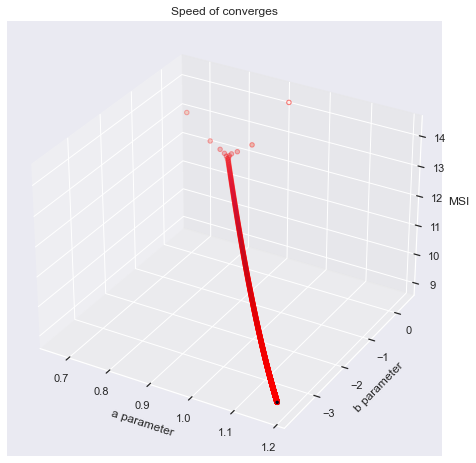

In [476]:
# x, y, z = a, b, MSE
ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# linear(X, y)
# zline = MSE_global
# xline = a_global
# yline = b_global
# ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = MSE_global
xdata = a_global
ydata = b_global

plt.title("Speed of converges")
ax.set_xlabel('a parameter')
ax.set_ylabel('b parameter')
ax.set_zlabel('MSI')

ax.scatter3D(xdata, ydata, zdata, c=zdata, edgecolor='red');

**Задание 6.** Загрузите набор данных houses.csv из текстового файла.

In [582]:
df_houses = pd.read_csv("houses.csv", names=["first", "second", "third"])
df_houses.head()

,first,second,third
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**Задание 7.** Произведите  нормализацию  признаков.  Повлияло  ли  это  на  скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [523]:
from sklearn.preprocessing import StandardScaler

In [583]:
# normalizing data using SS (StandardScaler)
# as second label is categorical data, so we will not use SS to it
df_houses_norm = df_houses.copy()
df_houses_norm["first"] = StandardScaler().fit_transform(df_houses_norm["first"].values.reshape(-1,1))
df_houses_norm["third"] = StandardScaler().fit_transform(df_houses_norm["third"].values.reshape(-1,1))

In [585]:
df_houses_norm.head()

,first,second,third
0,0.131415,3,0.480890
1,-0.509641,3,-0.084983
2,0.507909,3,0.231097
3,-0.743677,2,-0.876398
4,1.271071,4,1.612637


In [540]:
# sns.set_style("darkgrid")
# sns.set(rc={'figure.figsize':(12,8)},)
# sns.regplot(y="first", x="third", data=df_houses).set_title("dependens of first and second feature")

In [578]:
# plt.plot(X, y_pred, 'g', linewidth=1)

# plt.figure(figsize=(15,10))
# plt.title("dependent of population and profit of restaurant")
# plt.ylabel("First")
# plt.xlabel("Trird")

# plt.plot(X, y_pred_sklearn, linewidth=10)

#     n_epochs = [5, 50, 100, 250, 500, 1000]
#     for epoch in n_epochs:
#         w = linear(X, y, n_epochs=epoch)
#         y_pred = np.array([func_a_b(w[0], w[1], x) for x in X])
        
# plot_linear(X, y)


In [598]:
X_norm = df_houses_norm["first"]
y_norm = df_houses_norm["third"]

c_norm = np.array(list(zip(X_norm, X_norm)))
c_norm = c.reshape(-1, 2)

reg_norm = LinearRegression().fit(c_norm, y_norm)

y_pred_sklearn_norm = reg_norm.predict(c_norm)


In [599]:
X = df_houses["first"]
y = df_houses["third"]

c = np.array(list(zip(X, X)))
c = c.reshape(-1, 2)

reg = LinearRegression().fit(c, y)

y_pred_sklearn = reg.predict(c)


(0.0, 750000.0)

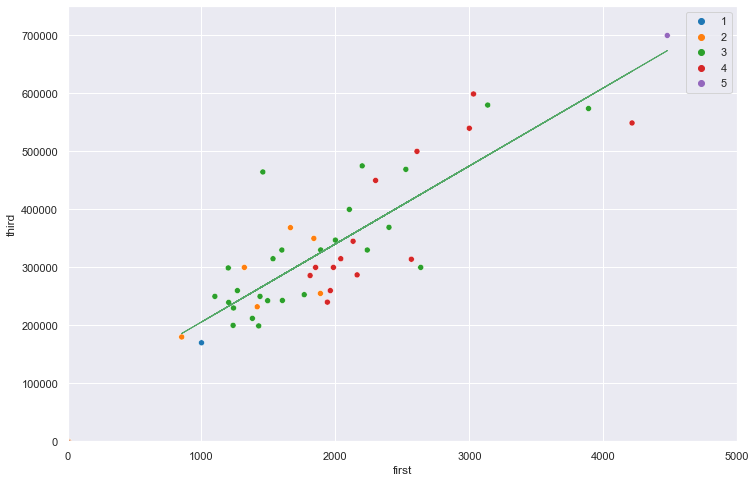

In [602]:
sns.set_style("darkgrid")

sns.scatterplot("first", "third", hue=df_houses["second"], data=df_houses, legend="full", palette="tab10")
sns.scatterplot("first", "third", data=df_houses_norm)

plt.plot(X_norm, y_pred_sklearn_norm, 'g', linewidth=1)
plt.plot(X, y_pred_sklearn, 'g', linewidth=1)

plt.xlim(0, 5000)
plt.ylim(0, 750000)
    

**Задание 8.** Реализуйте  функции  потерь  MSE  и  градиентного  спуска  для  случая многомерной линейной регрессии с использованием векторизации.

**Задание 9.** Покажите, что векторизация дает прирост производительности.

**Задание 10.** Попробуйте  изменить  параметр  $\eta$ (learning rate).  Как  при этом  изменяется  график  функции  потерь  в  зависимости  от  числа итераций градиентного спуск? Результат изобразите вкачестве графика.

**Задание 11.** Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.